In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

sizeTitle = 20
sizeAxis = 10

## Mountain dataset

<IPython.core.display.Javascript object>


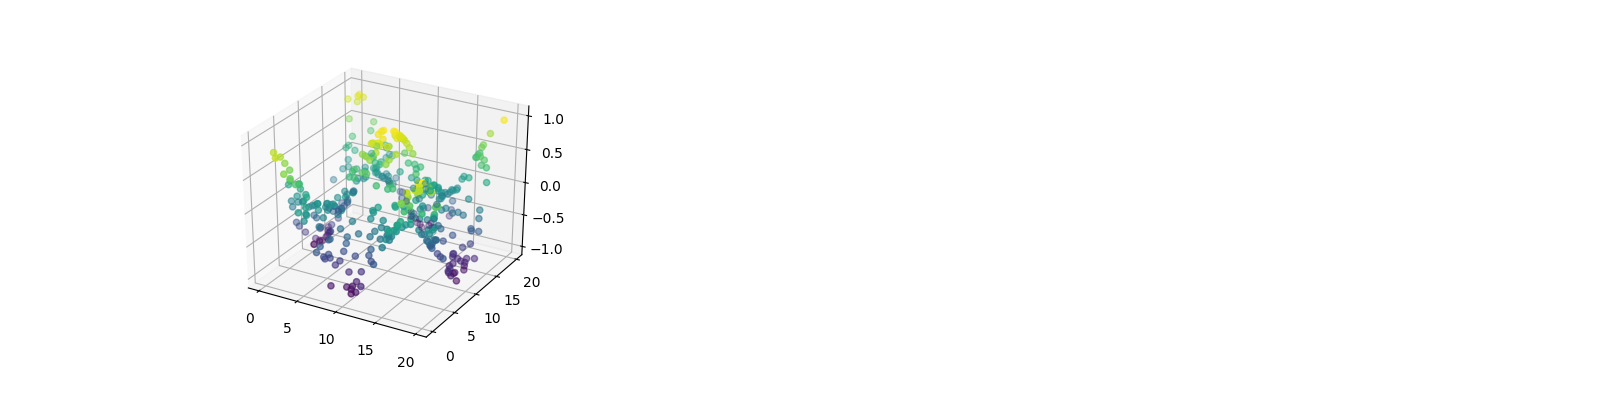

In [5]:
# Generate "mountain" dataset
N = 400 # Number of points
rangeX = 20
rangeY = 20

# 4 dimensions: x, y, z and color
mountain = np.empty((N,4))

mountain[:, 0] = np.random.rand(N) * rangeX
mountain[:, 1] = np.random.rand(N) * rangeY

# Sample a cos(x)*cos(y) function
mountain[:, 2] = np.multiply(np.cos(mountain[:, 0] * 2*np.pi / rangeX), np.cos(mountain[:, 1] * 2*np.pi / rangeY))

# Color = height
mountain[:, 3] = mountain[:, 2]

# Save data for later use
np.save("mountain", mountain)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain[:,0], mountain[:,1], mountain[:,2], c=mountain[:,3])
plt.show()

<IPython.core.display.Javascript object>


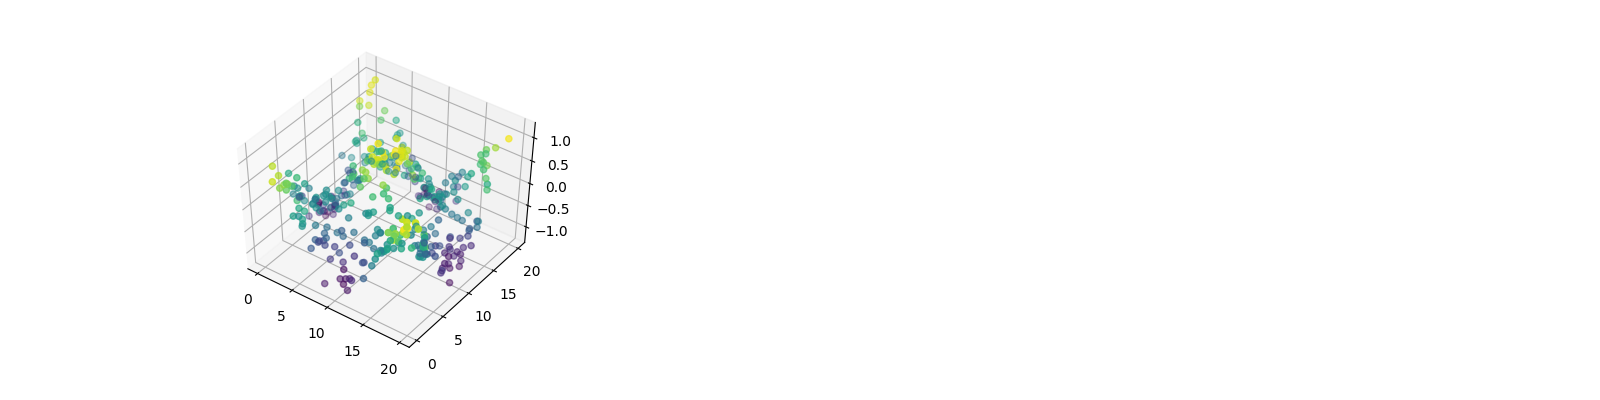

In [7]:
# Add some noise to the data
noiseMax = 0.5
mountainNoise = np.copy(mountain)
mountainNoise[:, 2] += (np.random.rand(N) - 0.5) * noiseMax

# Save data for later use
np.save("mountain_noise", mountainNoise)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountainNoise[:,0], mountainNoise[:,1], mountainNoise[:,2], c=mountainNoise[:,3])
plt.show()

<IPython.core.display.Javascript object>


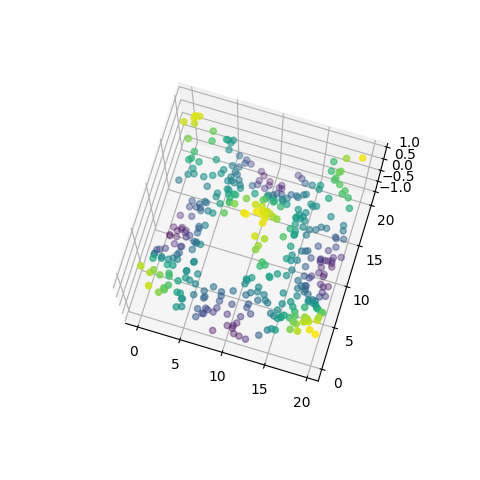

In [8]:
# Let's severe make a hole in the "moutain"
xSorted = np.argsort(mountain[:, 0])
ySorted = np.argsort(mountain[:, 1])

xRemove = xSorted[round(N/4):round(N/2)]
yRemove = ySorted[round(N/4):round(N/2)]

removeIndices = np.intersect1d(xRemove, yRemove)

mountainHole = np.delete(mountain, removeIndices, axis=0)

# Save data for later use
np.save("mountain_hole", mountainHole)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(mountainHole[:,0], mountainHole[:,1], mountainHole[:,2], c=mountainHole[:,3])
plt.show()

<IPython.core.display.Javascript object>


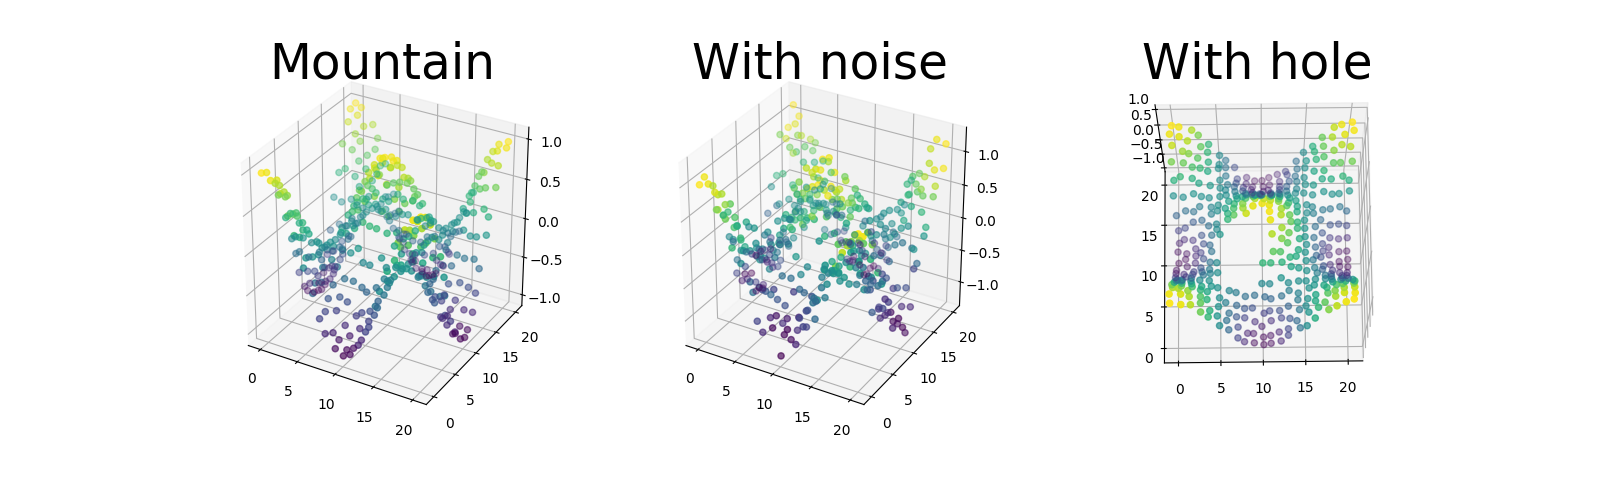

In [50]:
# Plot the 3 on one graph
fig = plt.figure(figsize = plt.figaspect(0.3))
matplotlib.rcParams.update({'font.size':sizeAxis})

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain[:,0], mountain[:,1], mountain[:,2], c=mountain[:,3])
plt.title('Mountain', fontsize=35)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(mountainNoise[:,0], mountainNoise[:,1], mountainNoise[:,2], c=mountainNoise[:,3])
plt.title('With noise', fontsize=35)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(mountainHole[:,0], mountainHole[:,1], mountainHole[:,2], c=mountainHole[:,3])
plt.title('With hole', fontsize=35)

plt.show()

In [51]:
#plt.savefig('mountains.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


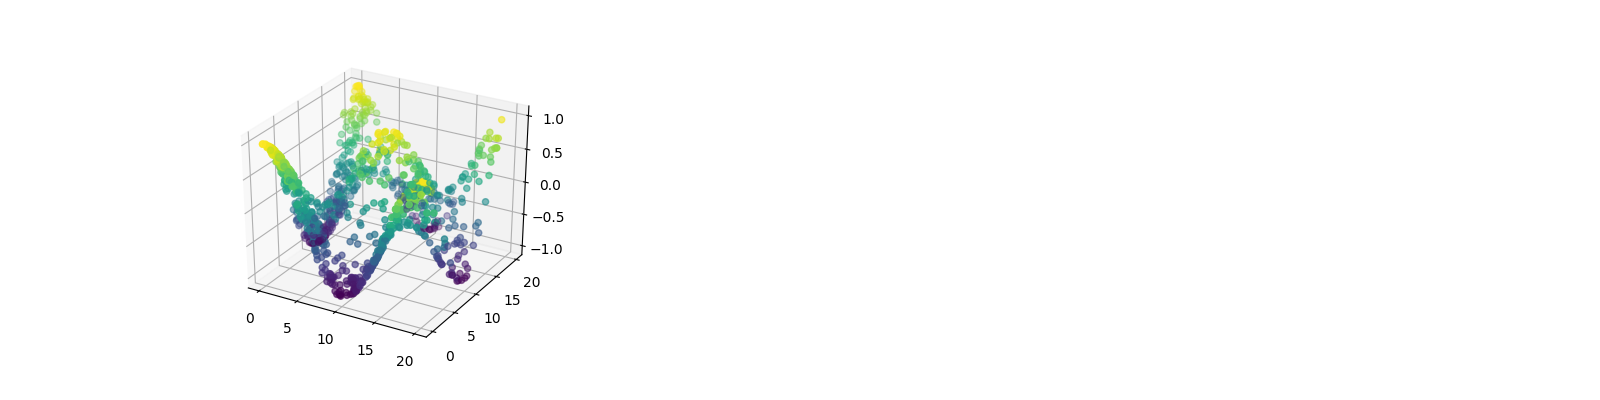

In [10]:
# Non uniform sampling

# Generate "mountain" dataset
N = 1000 # Number of points
rangeX = 20
rangeY = 20

# 4 dimensions: x, y, z and color
mountain_non_uni = np.empty((N,4))

# Non uniform sampling: corner very dense, 2 side dense, rest less dense
mountain_non_uni[:round(N/4), 0] = np.random.rand(round(N/4)) * rangeX/8
mountain_non_uni[:round(N/4), 1] = np.random.rand(round(N/4)) * rangeY

mountain_non_uni[round(N/4):round(N/2), 0] = np.random.rand(round(N/4)) * rangeX
mountain_non_uni[round(N/4):round(N/2), 1] = np.random.rand(round(N/4)) * rangeY/8

mountain_non_uni[round(N/2):, 0] = np.random.rand(round(N/2)) * rangeX
mountain_non_uni[round(N/2):, 1] = np.random.rand(round(N/2)) * rangeY

# Sample a cos(x)*cos(y) function
mountain_non_uni[:, 2] = np.multiply(np.cos(mountain_non_uni[:, 0] * 2*np.pi / rangeX), np.cos(mountain_non_uni[:, 1] * 2*np.pi / rangeY))

# Color = height
mountain_non_uni[:, 3] = mountain_non_uni[:, 2]

# Save data for later use
np.save("mountain_non_uni", mountain_non_uni)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain_non_uni[:,0], mountain_non_uni[:,1], mountain_non_uni[:,2], c=mountain_non_uni[:,3])
plt.show()

In [34]:
plt.savefig('mountain_non_uni.eps', format='eps', bbox_inches='tight')

## Cylinder dataset

<IPython.core.display.Javascript object>


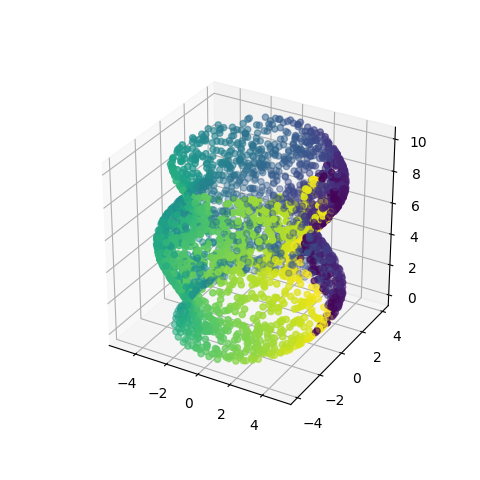

In [24]:
# Generate "mountain" dataset
N = 3000 # Number of samples
radius = 4
height = 10

# 4 dimensions: x, y, z and color
cylinder = np.empty((N,4))

angle = np.random.rand(1, N) * 2 *np.pi

# Generate sampling grid (x and y)
cylinder[:, 0] = radius * np.cos(angle)
cylinder[:, 1] = radius * np.sin(angle)
cylinder[:, 2] = np.random.rand(1, N) * height

cylinder[:, 0] += np.sin(cylinder[:, 2] / height * 3*np.pi)

# Color is radial
cylinder[:, 3] = angle

# Save data for later use
np.save("cylinder_full", cylinder)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(cylinder[:,0], cylinder[:,1], cylinder[:,2], c=cylinder[:,3])
#plt.show()
plt.savefig('cylinder_full.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


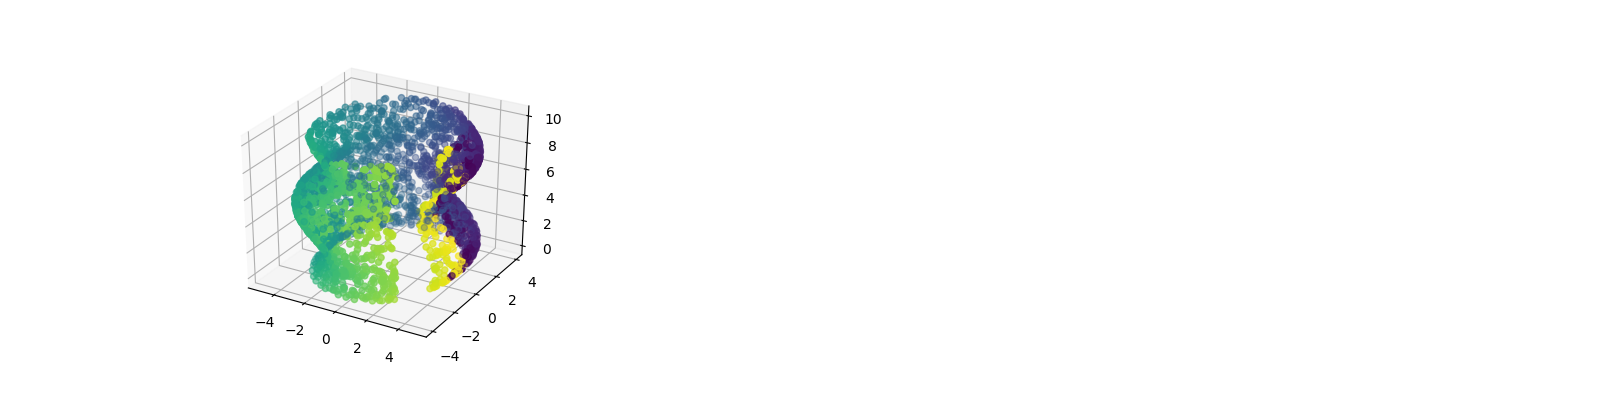

In [25]:
# Create a slit so that the cylinder is easier to unfold
rSorted = np.argsort(np.square(cylinder[:, 0]) + np.square(cylinder[:, 1]))
zSorted = np.argsort(cylinder[:, 2])

phi = np.arctan2(cylinder[:, 1], cylinder[:, 0])
phiSorted = np.argsort(phi)

phiRemove = phiSorted[round(N/2.8):round(N/2.35)]

cylinder_slit = np.delete(cylinder, phiRemove, axis=0)

# Save data for later use
np.save("cylinder", cylinder_slit)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(cylinder_slit[:,0], cylinder_slit[:,1], cylinder_slit[:,2], c=cylinder_slit[:,3])
#plt.show()
plt.savefig('cylinder.eps', format='eps', bbox_inches='tight')

## Twist dataset

<IPython.core.display.Javascript object>


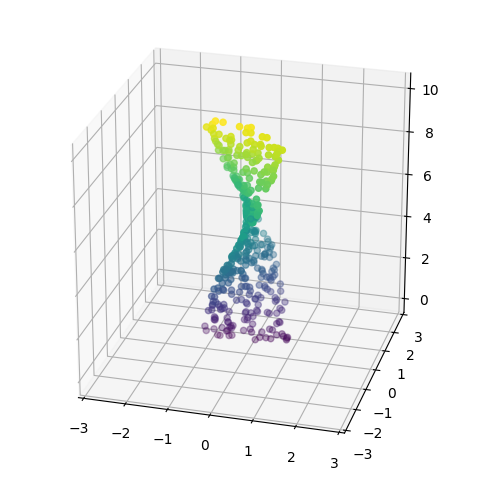

In [37]:
N = 400 # Number of points
width = 2
length = 10

u = np.random.rand(1, N) * length
v = (np.random.rand(1, N) - 0.5) * width

# 4 dimensions: x, y, z and color
twist = np.empty((N,4))

twist[:, 2] = u

twist[:, 0] = np.multiply(np.cos(twist[:, 2] * np.pi / length), v)
twist[:, 1] = np.multiply(np.sin(twist[:, 2] * np.pi / length), v)

# Color = height
twist[:, 3] = twist[:, 2]

# Save data for later use
np.save("twist", twist)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(twist[:,0], twist[:,1], twist[:,2], c=twist[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

In [32]:
plt.savefig('twist.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


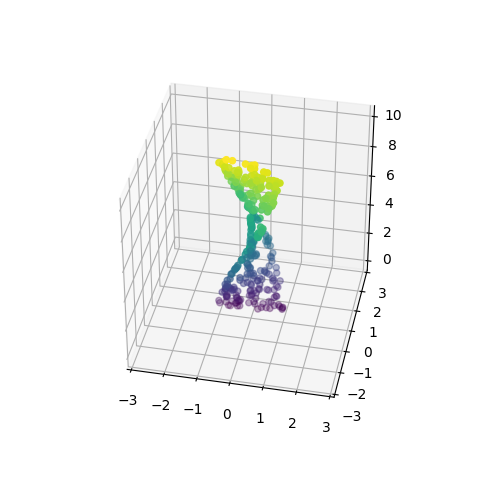

In [38]:
# Let's remove a part
rSorted = np.argsort(np.square(twist[:, 0]) + np.square(twist[:, 1]))
zSorted = np.argsort(twist[:, 2])

rRemove = rSorted[round(N/4):round(3*N/4)]
zRemove = zSorted[round(N/4):round(N*3/4)]

removeIndices = np.intersect1d(rRemove, zRemove)

twistHole = np.delete(twist, removeIndices, axis=0)

fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(twistHole[:,0], twistHole[:,1], twistHole[:,2], c=twistHole[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# Save data for later use
np.save("twist_hole", twistHole)

In [52]:
plt.savefig('twist_hole.eps', format='eps', bbox_inches='tight')

## Exponential spiral

<IPython.core.display.Javascript object>


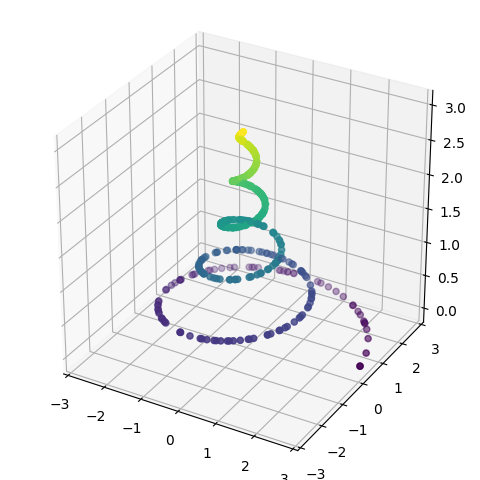

In [30]:
N = 400 # Number of points

width = 3
tau = 0.1
t_max = 30

t = np.random.rand(1, N) * t_max

# 4 dimensions: x, y, z and color
spiral = np.empty((N,4))

spiral[:, 2] = 0.1*t

spiral[:, 0] = np.multiply(np.cos(t), width*np.exp(-tau*t))
spiral[:, 1] = np.multiply(np.sin(t), width*np.exp(-tau*t))

# Color = height
spiral[:, 3] = spiral[:, 2]

# Save data for later use
np.save("spiral", spiral)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(spiral[:,0], spiral[:,1], spiral[:,2], c=spiral[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

In [31]:
plt.savefig('spiral_few.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


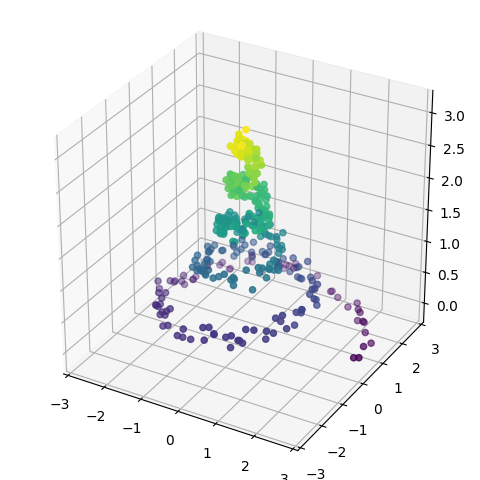

In [32]:
# Add noise
spiral_noise = np.copy(spiral)

noise = 0.3

spiral_noise[:,0] += noise*(np.random.rand(N) - 0.5)
spiral_noise[:,1] += noise*(np.random.rand(N) - 0.5)
spiral_noise[:,2] += noise*(np.random.rand(N) - 0.5)

# Save data for later use
np.save("spiral_noise", spiral_noise)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(spiral_noise[:,0], spiral_noise[:,1], spiral_noise[:,2], c=spiral_noise[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()